
# Linear Regression for IBM Stock Price Data
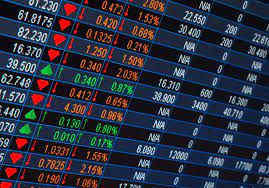

* In this repo, you'll apply Linear Regression to IBM Stock Price Data(1962-Present) for Closing Prices from yfinance library of Python. 
As evaluation metric, you'll prefer the Root Mean Square Error. 

#### Downloading yfinance
* Yfinance is a python package that enables us to fetch historical market data from Yahoo Finance API in a Pythonic way. 

In [2]:
# downloading yfinance
! pip3 install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=40f3a02ea2053257e7013595c4ec2021b17fcb0a98ab4b60e273dc2b69783826
  Stored in directory: c:\users\talfi\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


#### Importing Data from yfinance library

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# To download a data from yfinance, you should use yf.download("Objective")
ibm = yf.download("MFST")
ibm.shape

[*********************100%***********************]  1 of 1 completed


(2388, 6)

#### Inspecting Data
* Print the first 5 rows of the data.

In [25]:
ibm = ibm.reset_index() # If you receive any error, comment out this line.
ibm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-03,1050.0,1400.0,1050.0,1400.0,1400.0,2
1,2012-10-04,1400.0,1400.0,1400.0,1400.0,1400.0,0
2,2012-10-05,1400.0,1400.0,1400.0,1400.0,1400.0,0
3,2012-10-08,1400.0,1400.0,1400.0,1400.0,1400.0,0
4,2012-10-09,1400.0,1400.0,1400.0,1400.0,1400.0,0


* Set the index with `ibm.reset_index()` . Set `inplace` parameter to `true`
* After that, print first 5 rows one more time.

In [26]:
ibm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-03,1050.0,1400.0,1050.0,1400.0,1400.0,2
1,2012-10-04,1400.0,1400.0,1400.0,1400.0,1400.0,0
2,2012-10-05,1400.0,1400.0,1400.0,1400.0,1400.0,0
3,2012-10-08,1400.0,1400.0,1400.0,1400.0,1400.0,0
4,2012-10-09,1400.0,1400.0,1400.0,1400.0,1400.0,0


* Open: Opening price for the spesific timeline
* High: Highest price for the spesific timeline
* Low: Lowest price for the spesific timeline
* Close: Closing price for the spesific timeline
* Adj Close: Adjusted Closing Price for the spesific timeline. For more info, visit here: https://www.investopedia.com/terms/a/adjusted_closing_price.asp
* Volume: Volume is the total value of the shares traded.

* Create a line graph that includes the following: the `Date` column in the X axis and `Close` column in the Y axis. 
* After that, evaluate the graph with your own words.

<AxesSubplot:xlabel='Date'>

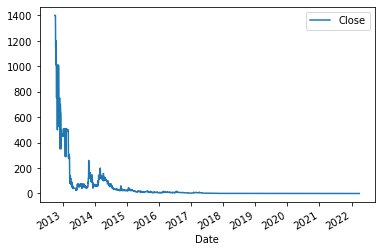

In [27]:
ibm.plot(x="Date", y="Close")

* Let's set the index as `Date` column
* So far, we see the IBM's stock prices from 1961. That doesn't mean anything since we are 2022. Let's make it reverse and see the up-to-date prices first. Use `sort_values` for that purpose.

In [28]:
ibm = ibm.set_index("Date")
ibm.sort_values(by = "Date", ascending = False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-30,0.0001,0.0001,0.0001,0.0001,0.0001,0
2022-03-29,0.0001,0.0001,0.0001,0.0001,0.0001,0
2022-03-28,0.0001,0.0001,0.0001,0.0001,0.0001,0
2022-03-25,0.0001,0.0001,0.0001,0.0001,0.0001,0
2022-03-24,0.0001,0.0001,0.0001,0.0001,0.0001,0
...,...,...,...,...,...,...
2012-10-09,1400.0000,1400.0000,1400.0000,1400.0000,1400.0000,0
2012-10-08,1400.0000,1400.0000,1400.0000,1400.0000,1400.0000,0
2012-10-05,1400.0000,1400.0000,1400.0000,1400.0000,1400.0000,0


* Return the dtypes of the each cols.

In [29]:
ibm.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

#### SPLITTING DATA INTO TRAIN & TEST SETS

* Split data into train & test sets by sklearn's `train_test_split` <br>
* Use `Close` column as target column.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ibm.drop(columns='Close'), ibm["Close"], test_size = 0.3,
                                                   random_state = 123)

#### Linear Regression Model
* Apply `sklearn`s `LinearRegression` to the splitted data with `fit()` and `predict()`

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


#### RMSE(Root Mean Squarred Error) or Possibly Others
* Evaluate Linear Regression Model with RMSE. 
* **Note:** You can use `sklearn.metrics` `mean_squared_error` and rename it MSE while importing it. After that, you can root MSE score to achieve RMSE.

In [33]:
from sklearn.metrics import mean_squared_error as MSE
RMSE = MSE(y_pred, y_test)**(1/2)
print("R.M.S.E for  Linear Regression Base Model is: ", RMSE)

R.M.S.E for  Linear Regression Base Model is:  1.3763872051628368e-07
